<center>Universidade Estadual Paulista - UNESP</center>
<center>Faculdade de Engenharia de Ilha Solteira - FEIS</center>
<center>Departamento de Engenharia Mecânica - DEM</center>
<center>Programa de Pós-Graduação em Engenharia Mecânica - PPGEM</center>
<br>
<center><b>Disciplina: Dinâmica dos Sistemas Mecânicos</b></center>
<center><b>Pêndulo Simples parametrizado por x e y via Princípio de Hamilton</b></center>
<br>
<center><b>Docente:</b> Samuel da Silva</center>
<center><b>Discentes:</b> Estevão Fuzaro de Almeida</center>
<center>Henrique Cordeiro Novais</center>

---

<center><img src="imgs/pendulo.png" alt="pendulo" width="290" height="341"/></center>

In [19]:
# Bibliotecas
import numpy as np
import matplotlib.pyplot as plt
import sympy as smp
from scipy.integrate import odeint
import matplotlib.font_manager as font_manager
from matplotlib import rc

# Setar fontes em LaTeX para os plots
rc('font', **{'family': 'serif', 'serif': ['Computer Modern'],'size': '18'})
rc('text', usetex=True)

### **1. Fazendo por $x$ e $y$.**

In [20]:
# Definindo as variáveis do problema
t, L, m, g, h = smp.symbols('t, L, m, g, h', real=True) # Tempo "t", Comprimento "l", Massa "m", Gravidade "g", Altura "h"
x, y = smp.symbols('x, y', cls=smp.Function) # x e y -> Coordenadas não-generalizadas
lbda = smp.symbols('\lambda',real=True)

In [21]:
# Criando os deslocamentos
x = x(t)
y = y(t)

# Criando as velocidades
xdot = smp.diff(x,t)
ydot = smp.diff(y,t)

# Criando as acelerações
xddot = smp.diff(xdot,t)
yddot = smp.diff(ydot,t)

In [22]:
# Vínculo holônomo
cnstr = x**2 + y**2 - L**2
cnstrx = smp.diff(cnstr,x)
cnstry = smp.sqrt(L**2 - x**2)
eq = - cnstrx/(2*cnstry)
eq

-x(t)/sqrt(L**2 - x(t)**2)

In [23]:
# Principio de Hamilton
dLdx = smp.diff(L,x)
dLdxdot = smp.diff(L,xdot)
dLdy = smp.diff(L,y)
dLdydot = smp.diff(L,ydot)
Ham_x = dLdx - smp.diff(dLdxdot,t)
Ham_y = dLdy - smp.diff(dLdydot,t)
Ham = Ham_x + Ham_y*eq
Ham

0

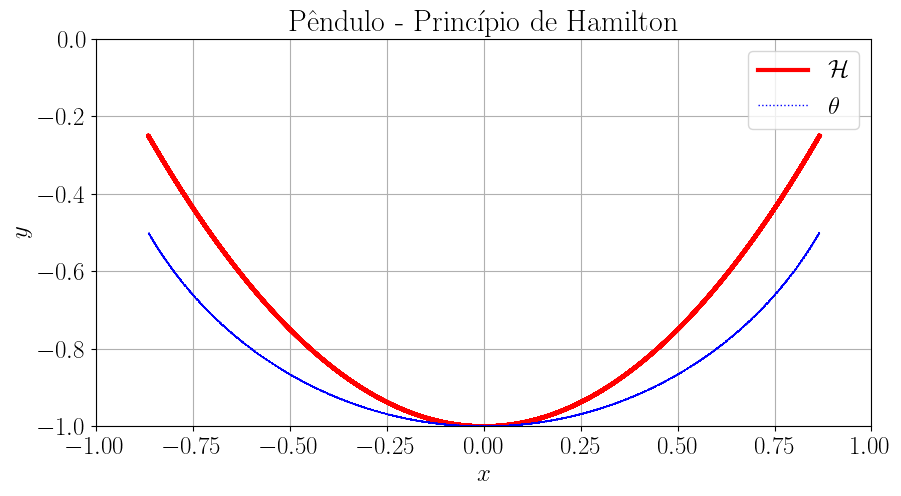

In [24]:
# Parâmetros do sistema
g = 9.81  # aceleração da gravidade
L = 1.0   # comprimento do pêndulo

# Intervalo de tempo para integração
t_start = 0.0
t_end = 20.0
t_step = 0.001
t_span = np.arange(t_start, t_end, t_step)

## HAMILTON --------------------------------------------------------
def pendulum_ham(z, t):
    z1 = z[0]
    z2 = z[1]
    dz1_dt = z2
    dz2_dt = -((g*(L**2 - z1**2)**(3/2) + L**2*(z2**2))*z1)/(L**2*z1**2 + (L**2 - z1**2)**2 - z1**4)
    return [dz1_dt, dz2_dt]

# Condições iniciais
z0 = [L*np.sin(np.pi/3), 0.0]  # z1(0), z2(0)

# Resolvendo o sistema de equações diferenciais
solution = odeint(pendulum_ham, z0, t_span)

# Obtendo as soluções para z1, z2, z3 e z4
x_sol = solution[:, 0]
y_sol = (L**2 - x_sol**2)

## TRADICIONAL --------------------------------------------------------
def pendulum_an(z, t):
    z1 = z[0]
    z2 = z[1]
    dz1_dt = z2
    dz2_dt = -g/L*np.sin(z1)
    return [dz1_dt, dz2_dt]

# Condições iniciais
z0 = [np.pi/3, 0.0]  # z1(0), z2(0)

# Resolvendo o sistema de equações diferenciais
solution_an = odeint(pendulum_an, z0, t_span)

# Obtendo as soluções para z1, z2
x_sol_an = L*np.sin(solution_an[:, 0])
y_sol_an = L*np.cos(solution_an[:, 0])

# Plotando as soluções
plt.figure(figsize=(10, 8))
plt.plot(x_sol, -y_sol, linestyle='-', color='red', linewidth=3, label=r'$\mathcal{H}$')
plt.plot(x_sol_an, -y_sol_an, linestyle=':', color='blue', linewidth=1, label=r'$\theta$')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title('Pêndulo - Princípio de Hamilton')
plt.legend()
plt.grid(True)
plt.xlim(-1.0,1.0)
plt.ylim(-1.0,0.0)
plt.axis()
ax = plt.gca()
ax.set_aspect('equal', adjustable='box')
plt.show()